Importing Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Loading

In [4]:
original_data = pd.read_csv("../data/Student Mental health.csv")

In [5]:
original_data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


## Data Cleaning
- Renaming column head.
- Handling Missing data
- Handling Duplicates

In [6]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [7]:
original_data.nunique()

Timestamp                                       92
Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In [8]:
original_data['What is your course?'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [9]:
original_data['What is your CGPA?'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [10]:
original_data['Your current year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [11]:
original_data[original_data['Age'].isna()]

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
43,8/7/2020 15:07,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No


### From above analysis we can deduce that:

1. We will rename all the column heading (shorten them).
2. Timestamp column is not required in our analysis, so we will drop this column.
3. Age column has one missing value, we will either fill it with mean of age column or remove that particular row.
4. Course Name has formatting issues, this has to be handcorrectedled. ( Laws is same as law)
5. Current year of study has formatting issues, this has to be corrected. ( year 1 is same as Year 1)
6. Few rows in CGPA column has space in end, has to be corrected.

In [12]:
# Making a copy of original data so original data is kept intact.
working_data = original_data.copy()

In [13]:
# Dropping timestamp column

working_data.drop(['Timestamp'], axis=1, inplace=True)
working_data.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [14]:
# Renaming column headings

working_data.rename(columns={
                            'Choose your gender' : 'gender',
                            'Age' : 'age',
                            'What is your course?' : 'course',
                            'Your current year of Study' : 'current_year',
                            'What is your CGPA?' : 'cgpa',
                            'Marital status' : 'marital_status',
                            'Do you have Depression?' : 'has_depression',
                            'Do you have Anxiety?' : 'has_anxity',
                            'Do you have Panic attack?'  : 'has_panic_attack',
                            'Did you seek any specialist for a treatment?' : 'visited_specialist'}, inplace=True)
working_data.head()

,gender,age,course,current_year,cgpa,marital_status,has_depression,has_anxity,has_panic_attack,visited_specialist
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [15]:
# dropping row where value of age is null

working_data.dropna(inplace=True)
working_data.isna().sum()

gender                0
age                   0
course                0
current_year          0
cgpa                  0
marital_status        0
has_depression        0
has_anxity            0
has_panic_attack      0
visited_specialist    0
dtype: int64

In [16]:
# Correcting format of course names

working_data.replace({
                        'Engine':'Engineering',
                        'engin' : 'Engineering',
                        'Islamic education' : 'Islamic Education',
                        'BIT': 'IT',
                        'Laws' : 'Law',
                        'Pendidikan islam': 'Pendidikan Islam',
                        'Pendidikan Islam ': 'Pendidikan Islam',
                        'KIRKHS':'Irkhs',
                        'Kirkhs':'Irkhs',
                        'Marine science' : 'Marine Science',
                        'koe': 'Koe',
                        'KOE': 'Koe',
                        'Biomedical science' : 'Biomedical Science',
                        'Benl':'BENL',
                        'Econs' : 'Economics',
                        'Human Sciences ':'Human Sciences',
                        'psychology' : 'Psychology',
                        'Fiqh fatwa ' : 'Fiqh Fatwa',
                        'DIPLOMA TESL': 'Diploma TESL',
                        'Fiqh' : 'Fiqh Fatwa',
                        'Accounting ':'Accounting',
                        'Communication ':'Communication',
                        'Nursing ':'Nursing'}, inplace=True)
working_data['course'].unique()

array(['Engineering', 'Islamic Education', 'IT', 'Law', 'Mathemathics',
       'Pendidikan Islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting', 'ENM', 'Marine Science',
       'Koe', 'Banking Studies', 'Business Administration', 'Usuluddin ',
       'TAASL', 'ALA', 'Biomedical Science', 'BENL', 'CTS', 'Economics',
       'MHSC', 'Malcom', 'Kop', 'Human Sciences', 'Biotechnology',
       'Communication', 'Diploma Nursing', 'Radiography', 'Fiqh Fatwa',
       'Diploma TESL', 'Nursing'], dtype=object)

In [17]:
# Correcting format of current year

working_data.replace({'year 1' : 'Year 1',
                    'year 2' : 'Year 2',
                    'year 3' : 'Year 3',
                    'year 4' : 'Year 4'}, inplace=True)
working_data['current_year'].unique()

array(['Year 1', 'Year 2', 'Year 3', 'Year 4'], dtype=object)

In [18]:
# Removing trailing white spaces from cgpa column

working_data['cgpa'] = working_data['cgpa'].apply(lambda x:x.strip())
working_data['cgpa'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

## Data Visualisation

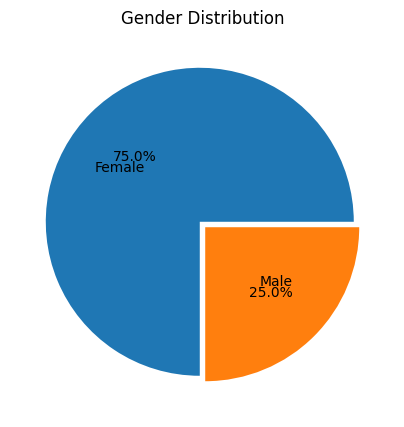

In [36]:
plt.figure(figsize=(14, 5))
plt.title('Gender Distribution')
plt.pie(working_data['gender'].value_counts(),labels=working_data['gender'].value_counts().index, autopct='%1.1f%%', explode=(0.025,0.025), labeldistance=0.5)
plt.show()

#### Analysis from above chart :
1. The survey exhibits a higher participation rate among women, which may introduce a potential gender bias in the resulting analysis.

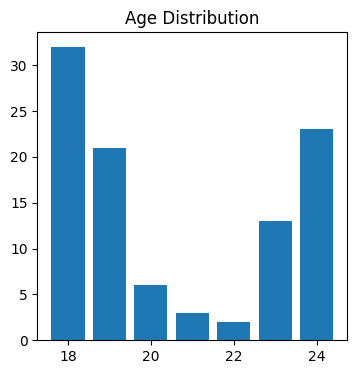

In [37]:
plt.figure(figsize=(4,4))
plt.title('Age Distribution')
plt.bar(x=working_data['age'].value_counts().index, height=working_data['age'].value_counts().values)
plt.show()

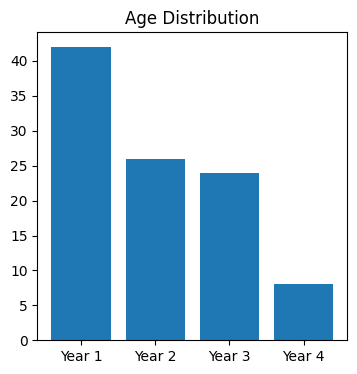

In [38]:
plt.figure(figsize=(4,4))
plt.title('Age Distribution')
plt.bar(x=working_data['current_year'].value_counts().index.tolist(), height=working_data['current_year'].value_counts().values.tolist())
plt.show()

### Analysis from above chart
2. The survey predominantly includes college freshmen, who are primarily aged 18 and 19, which may introduce a potential bias towards the experiences and perspectives of this specific group.

/var/folders/n4/669_syrx0qzf2gktz416h1d00000gn/T/ipykernel_1355/1353358431.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0,0].set_xticklabels(x_0_0, rotation=20)
/var/folders/n4/669_syrx0qzf2gktz416h1d00000gn/T/ipykernel_1355/1353358431.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0,1].set_xticklabels(x_0_1, rotation=20)
/var/folders/n4/669_syrx0qzf2gktz416h1d00000gn/T/ipykernel_1355/1353358431.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1,0].set_xticklabels(x_1_0, rotation=20)
/var/folders/n4/669_syrx0qzf2gktz416h1d00000gn/T/ipykernel_1355/1353358431.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1,1].set_xticklabels(x_1_1, rotation=20)


Text(0.5, 1.0, 'Year 4')

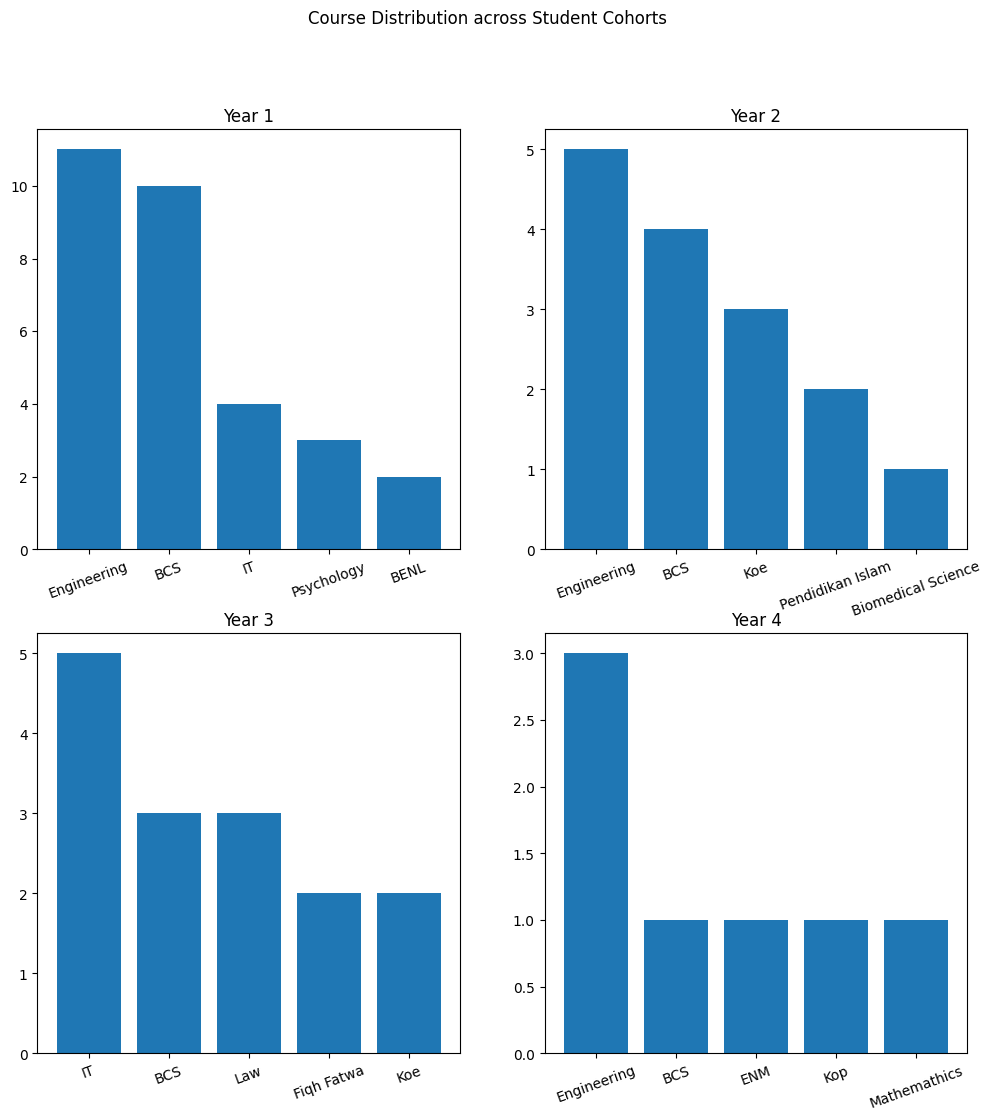

In [42]:
fig, axis = plt.subplots(2,2, figsize=(12,12))
fig.suptitle("Course Distribution across Student Cohorts")

x_0_0 = working_data[working_data['current_year'] == 'Year 1'].groupby('course')['gender'].count().sort_values(ascending=False).head().index.to_list()
y_0_0 = working_data[working_data['current_year'] == 'Year 1'].groupby('course')['gender'].count().sort_values(ascending=False).head().values.tolist()
axis[0,0].bar(x_0_0, y_0_0)
axis[0,0].set_xticklabels(x_0_0, rotation=20)
axis[0,0].set_title('Year 1')

x_0_1 = working_data[working_data['current_year'] == 'Year 2'].groupby('course')['gender'].count().sort_values(ascending=False).head().index.to_list()
y_0_1 = working_data[working_data['current_year'] == 'Year 2'].groupby('course')['gender'].count().sort_values(ascending=False).head().values.tolist()
axis[0,1].bar(x_0_1, y_0_1)
axis[0,1].set_xticklabels(x_0_1, rotation=20)
axis[0,1].set_title('Year 2')

x_1_0 = working_data[working_data['current_year'] == 'Year 3'].groupby('course')['gender'].count().sort_values(ascending=False).head().index.to_list()
y_1_0 = working_data[working_data['current_year'] == 'Year 3'].groupby('course')['gender'].count().sort_values(ascending=False).head().values.tolist()
axis[1,0].bar(x_1_0, y_1_0)
axis[1,0].set_xticklabels(x_1_0, rotation=20)
axis[1,0].set_title('Year 3')

x_1_1 = working_data[working_data['current_year'] == 'Year 4'].groupby('course')['gender'].count().sort_values(ascending=False).head().index.to_list()
y_1_1 = working_data[working_data['current_year'] == 'Year 4'].groupby('course')['gender'].count().sort_values(ascending=False).head().values.tolist()
axis[1,1].bar(x_1_1, y_1_1)
axis[1,1].set_xticklabels(x_1_1, rotation=20)
axis[1,1].set_title('Year 4')

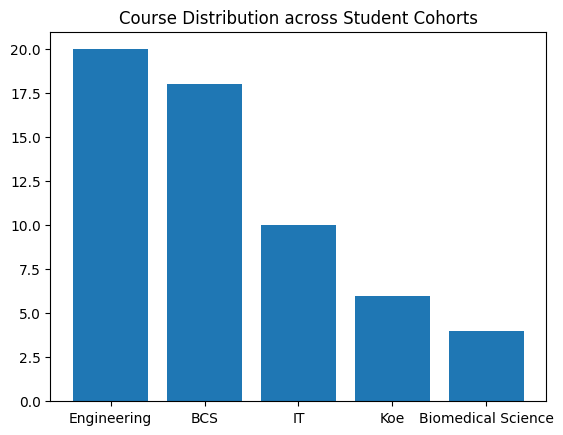

In [23]:
x = working_data.groupby('course')['gender'].count().sort_values(ascending=False).head().index.to_list()
y = working_data.groupby('course')['gender'].count().sort_values(ascending=False).head().values.tolist()
plt.title("Course Distribution across Student Cohorts")
plt.bar(x, y)
plt.show()

### Analysis from above chart
3. The survey primarily focuses on the participation of students studying Engineering and Computer Science disciplines, which may result in a potential bias towards the perspectives and experiences of individuals within these fields.

Text(0.5, 1.0, 'Year 4')

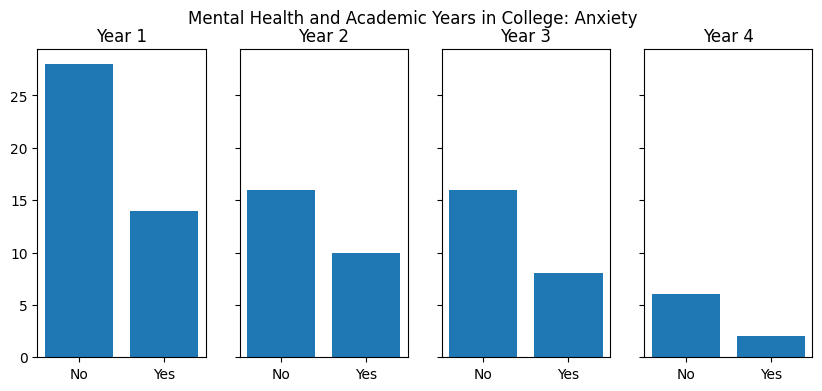

In [48]:
fig, axis = plt.subplots(1,4, figsize=(10, 4), sharey=True)
fig.suptitle("Mental Health and Academic Years in College: Anxiety")

x0 = working_data[working_data['current_year'] == 'Year 1']['has_anxity'].value_counts().index.tolist()
y0 = working_data[working_data['current_year'] == 'Year 1']['has_anxity'].value_counts().values.tolist()
axis[0].bar(x0, y0)
axis[0].set_title('Year 1')

x1 = working_data[working_data['current_year'] == 'Year 2']['has_anxity'].value_counts().index.tolist()
y1 = working_data[working_data['current_year'] == 'Year 2']['has_anxity'].value_counts().values.tolist()
axis[1].bar(x1, y1)
axis[1].set_title('Year 2')

x2 = working_data[working_data['current_year'] == 'Year 3']['has_anxity'].value_counts().index.tolist()
y2 = working_data[working_data['current_year'] == 'Year 3']['has_anxity'].value_counts().values.tolist()
axis[2].bar(x2, y2)
axis[2].set_title('Year 3')

x3 = working_data[working_data['current_year'] == 'Year 4']['has_anxity'].value_counts().index.tolist()
y3 = working_data[working_data['current_year'] == 'Year 4']['has_anxity'].value_counts().values.tolist()
axis[3].bar(x3, y3)
axis[3].set_title('Year 4')
# fig.supxlabel('common x label')

### Analysis from above chart :
4. Analyzing Anxiety Levels among College Students: A Majority with No Reported Symptoms.

<BarContainer object of 2 artists>

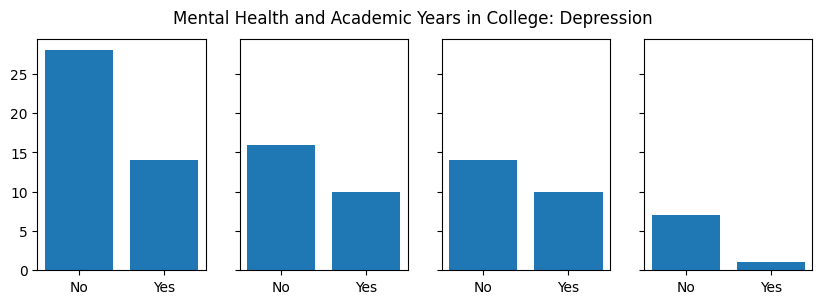

In [30]:
fig, axis = plt.subplots(1,4, figsize=(10, 3), sharey=True)
fig.suptitle("Mental Health and Academic Years in College: Depression")

x0 = working_data[working_data['current_year'] == 'Year 1']['has_depression'].value_counts().index.tolist()
y0 = working_data[working_data['current_year'] == 'Year 1']['has_depression'].value_counts().values.tolist()
axis[0].bar(x0, y0)

x1 = working_data[working_data['current_year'] == 'Year 2']['has_depression'].value_counts().index.tolist()
y1 = working_data[working_data['current_year'] == 'Year 2']['has_depression'].value_counts().values.tolist()
axis[1].bar(x1, y1)

x2 = working_data[working_data['current_year'] == 'Year 3']['has_depression'].value_counts().index.tolist()
y2 = working_data[working_data['current_year'] == 'Year 3']['has_depression'].value_counts().values.tolist()
axis[2].bar(x2, y2)

x3 = working_data[working_data['current_year'] == 'Year 4']['has_depression'].value_counts().index.tolist()
y3 = working_data[working_data['current_year'] == 'Year 4']['has_depression'].value_counts().values.tolist()
axis[3].bar(x3, y3)

### Analysis from above chart :
5. Examining Depression Rates among College Students: Majority Reporting No Symptoms

<BarContainer object of 2 artists>

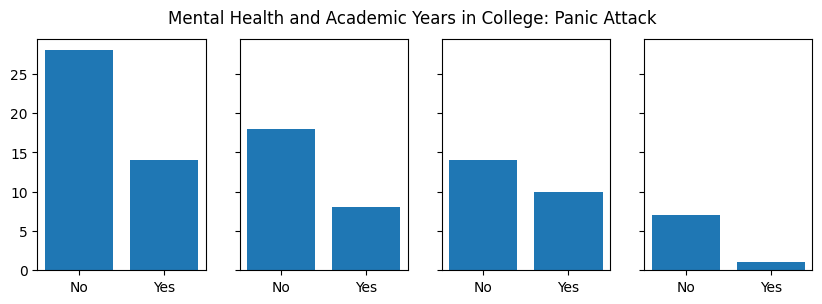

In [29]:
fig, axis = plt.subplots(1,4, figsize=(10, 3), sharey=True)
fig.suptitle("Mental Health and Academic Years in College: Panic Attack")

x0 = working_data[working_data['current_year'] == 'Year 1']['has_panic_attack'].value_counts().index.tolist()
y0 = working_data[working_data['current_year'] == 'Year 1']['has_panic_attack'].value_counts().values.tolist()
axis[0].bar(x0, y0)

x1 = working_data[working_data['current_year'] == 'Year 2']['has_panic_attack'].value_counts().index.tolist()
y1 = working_data[working_data['current_year'] == 'Year 2']['has_panic_attack'].value_counts().values.tolist()
axis[1].bar(x1, y1)

x2 = working_data[working_data['current_year'] == 'Year 3']['has_panic_attack'].value_counts().index.tolist()
y2 = working_data[working_data['current_year'] == 'Year 3']['has_panic_attack'].value_counts().values.tolist()
axis[2].bar(x2, y2)

x3 = working_data[working_data['current_year'] == 'Year 4']['has_panic_attack'].value_counts().index.tolist()
y3 = working_data[working_data['current_year'] == 'Year 4']['has_panic_attack'].value_counts().values.tolist()
axis[3].bar(x3, y3)

### Analysis from above chart :
6. Exploring the Prevalence of Panic Attacks among College Students: Majority Reporting No Incidents

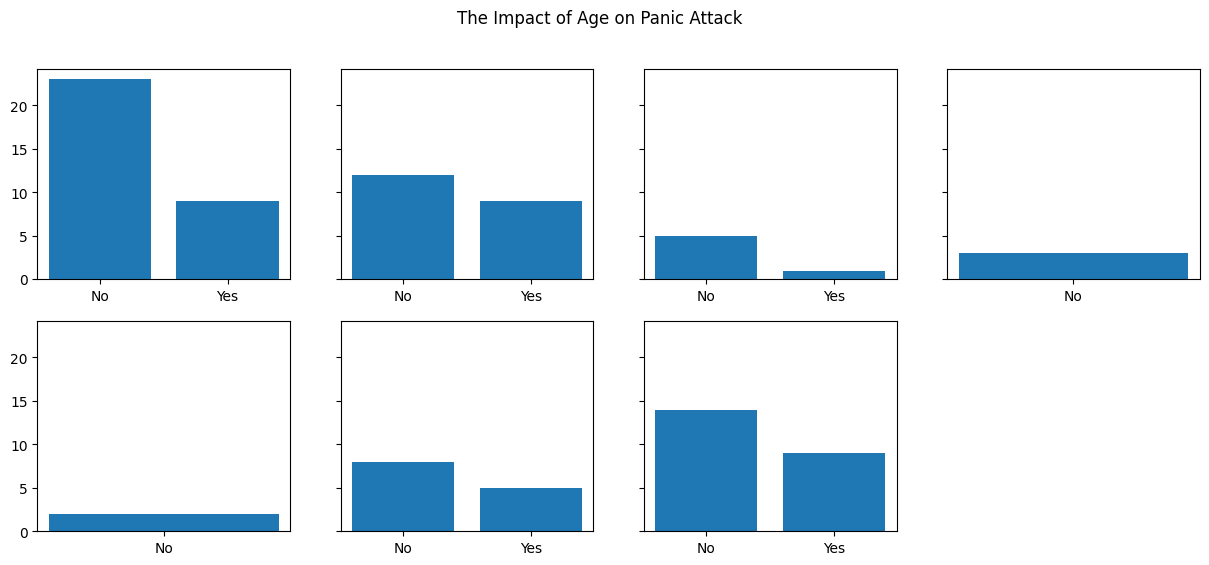

In [180]:
fig, axis = plt.subplots(2,4, figsize=(15, 6), sharey=True)
fig.suptitle("The Impact of Age on Panic Attack")

# age_list = [18,19,20,21,22,23,24]

counter = 0

for i in range(2):
    for j in range(4):
        if i == 1 and j == 3:
            pass
        else:
            x = working_data[working_data['age'] == sorted(working_data['age'].unique().tolist())[counter]]['has_panic_attack'].value_counts().index.tolist()
            y = working_data[working_data['age'] == sorted(working_data['age'].unique().tolist())[counter]]['has_panic_attack'].value_counts().values.tolist()
            axis[i,j].bar(x, y)
            counter += 1

fig.delaxes(axis[1,3])

#### Alternate Way

<!-- fig, axis = plt.subplots(2,4, figsize=(15, 6), sharey=True)
fig.suptitle("Mental Health and Academic Years in College: Panic Attack")

x0 = working_data[working_data['age'] == 18]['has_panic_attack'].value_counts().index.tolist()
y0 = working_data[working_data['age'] == 18]['has_panic_attack'].value_counts().values.tolist()
axis[0,0].bar(x0, y0)

x1 = working_data[working_data['age'] == 19]['has_panic_attack'].value_counts().index.tolist()
y1 = working_data[working_data['age'] == 19]['has_panic_attack'].value_counts().values.tolist()
axis[0,1].bar(x1, y1)

x2 = working_data[working_data['age'] == 20]['has_panic_attack'].value_counts().index.tolist()
y2 = working_data[working_data['age'] == 20]['has_panic_attack'].value_counts().values.tolist()
axis[0,2].bar(x2, y2)

x3 = working_data[working_data['age'] == 21]['has_panic_attack'].value_counts().index.tolist()
y3 = working_data[working_data['age'] == 21]['has_panic_attack'].value_counts().values.tolist()
axis[0,3].bar(x3, y3)

x4 = working_data[working_data['age'] == 22]['has_panic_attack'].value_counts().index.tolist()
y4 = working_data[working_data['age'] == 22]['has_panic_attack'].value_counts().values.tolist()
axis[1,0].bar(x4, y4)

x5 = working_data[working_data['age'] == 23]['has_panic_attack'].value_counts().index.tolist()
y5 = working_data[working_data['age'] == 23]['has_panic_attack'].value_counts().values.tolist()
axis[1,1].bar(x5, y5)

x6 = working_data[working_data['age'] == 24]['has_panic_attack'].value_counts().index.tolist()
y6 = working_data[working_data['age'] == 24]['has_panic_attack'].value_counts().values.tolist()
axis[1,2].bar(x6, y6)

fig.delaxes(axis[1,3]) -->

### Analysis from above chart :
7. Exploring the Prevalence of Panic Attacks among College Students: Majority Reporting No Incidents

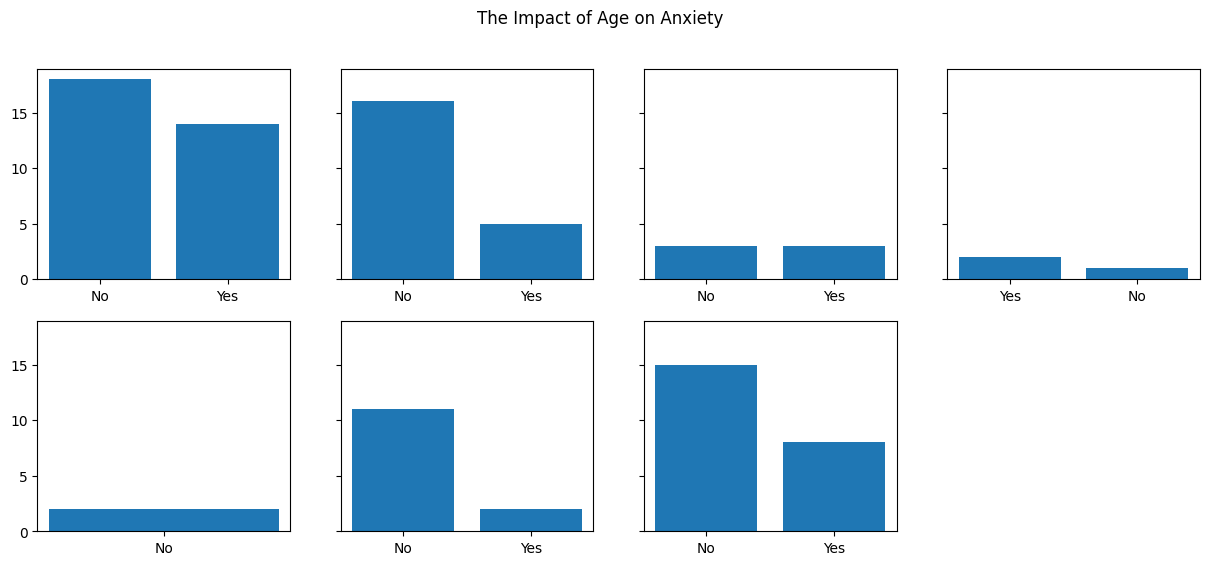

In [179]:
fig, axis = plt.subplots(2,4, figsize=(15, 6), sharey=True)
fig.suptitle("The Impact of Age on Anxiety")

counter = 0

for i in range(2):
    for j in range(4):
        if i == 1 and j == 3:
            pass
        else:
            x = working_data[working_data['age'] == sorted(working_data['age'].unique().tolist())[counter]]['has_anxity'].value_counts().index.tolist()
            y = working_data[working_data['age'] == sorted(working_data['age'].unique().tolist())[counter]]['has_anxity'].value_counts().values.tolist()
            axis[i,j].bar(x, y)
            counter += 1

fig.delaxes(axis[1,3])

### Analysis from above chart :
8. Examining Anxiety Levels among College Students: Majority Report No Symptoms

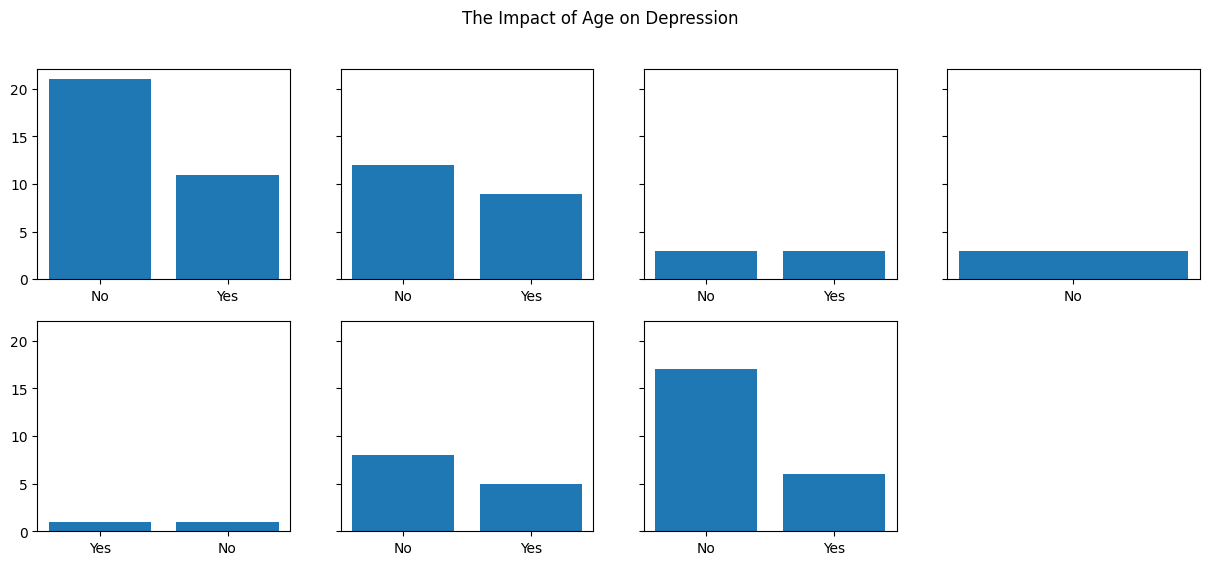

In [178]:
fig, axis = plt.subplots(2,4, figsize=(15, 6), sharey=True)
fig.suptitle("The Impact of Age on Depression")

counter = 0

for i in range(2):
    for j in range(4):
        if i == 1 and j == 3:
            pass
        else:
            x = working_data[working_data['age'] == sorted(working_data['age'].unique().tolist())[counter]]['has_depression'].value_counts().index.tolist()
            y = working_data[working_data['age'] == sorted(working_data['age'].unique().tolist())[counter]]['has_depression'].value_counts().values.tolist()
            axis[i,j].bar(x, y)
            counter += 1

fig.delaxes(axis[1,3])

### Analysis from above chart :
10. Depression Prevalence among College Students: Majority Report No Symptoms

In [111]:
print('has_depression')
print(working_data[working_data['has_depression'] == 'Yes']['has_anxity'].value_counts())
print('\nno_depression')
print(working_data[working_data['has_depression'] == 'No']['has_anxity'].value_counts())

has_depression
has_anxity
Yes    18
No     17
Name: count, dtype: int64

no_depression
has_anxity
No     49
Yes    16
Name: count, dtype: int64


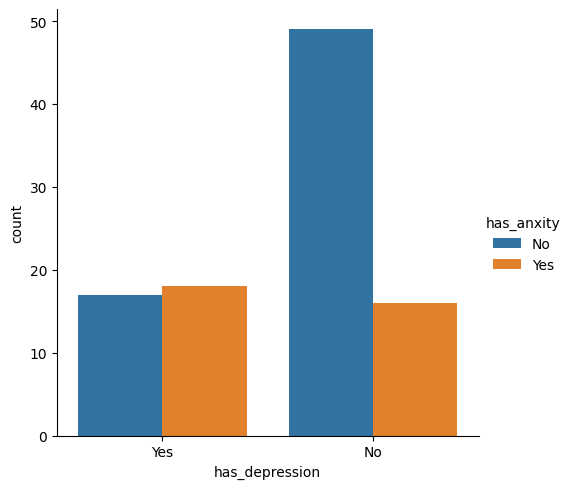

In [99]:
sns.catplot(data=working_data, x="has_depression", hue='has_anxity', kind="count")

### Analysis from above chart :

11. Students with depression have an equal likelihood of experiencing and not experiencing anxiety.
12. Students without depression have a lower probability of having anxiety.
13. The majority of college students neither have anxiety nor depression.
These points summarize the relationship between anxiety, depression, and college students, highlighting the equal chance of anxiety with depression, a lower chance without depression, and the majority being unaffected by either condition.

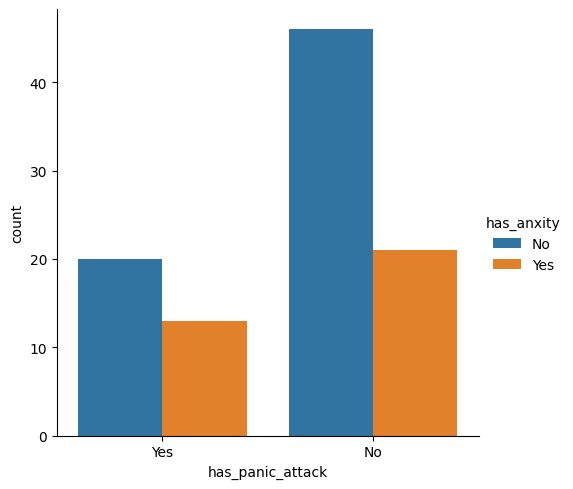

In [112]:
sns.catplot(data=working_data, x="has_panic_attack", hue='has_anxity', kind="count")

In [113]:
print('has_panic_attack')
print(working_data[working_data['has_panic_attack'] == 'Yes']['has_anxity'].value_counts())
print('\nno_panic_attack')
print(working_data[working_data['has_panic_attack'] == 'No']['has_anxity'].value_counts())

has_panic_attack
has_anxity
No     20
Yes    13
Name: count, dtype: int64

no_panic_attack
has_anxity
No     46
Yes    21
Name: count, dtype: int64


### Analysis from above chart :

14. Students who experience panic attacks have a slightly higher than 50% chance of also having anxiety.
15. Students who do not experience panic attacks have a less than 50% chance of having anxiety.
16. The majority of college students neither have anxiety nor panic attacks.

In [119]:
print('has_depression')
print(working_data[working_data['has_depression'] == 'Yes']['has_panic_attack'].value_counts())
print('\nno_depression')
print(working_data[working_data['has_depression'] == 'No']['has_panic_attack'].value_counts())

has_depression
has_panic_attack
No     18
Yes    17
Name: count, dtype: int64

no_depression
has_panic_attack
No     49
Yes    16
Name: count, dtype: int64


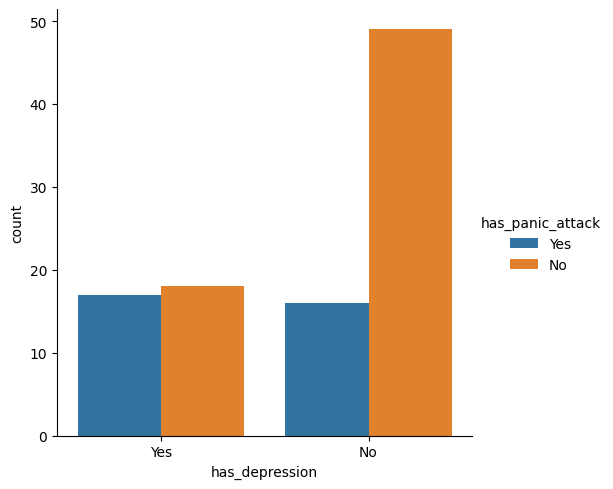

In [117]:
sns.catplot(data=working_data, x="has_depression", hue='has_panic_attack', kind="count")

### Analysis from above chart :

17. Students with depression have an equal likelihood of experiencing and not experiencing panic attacks.
18. Students without depression have a lower probability of having panic attacks.
19. The majority of college students neither have depression nor panic attacks.

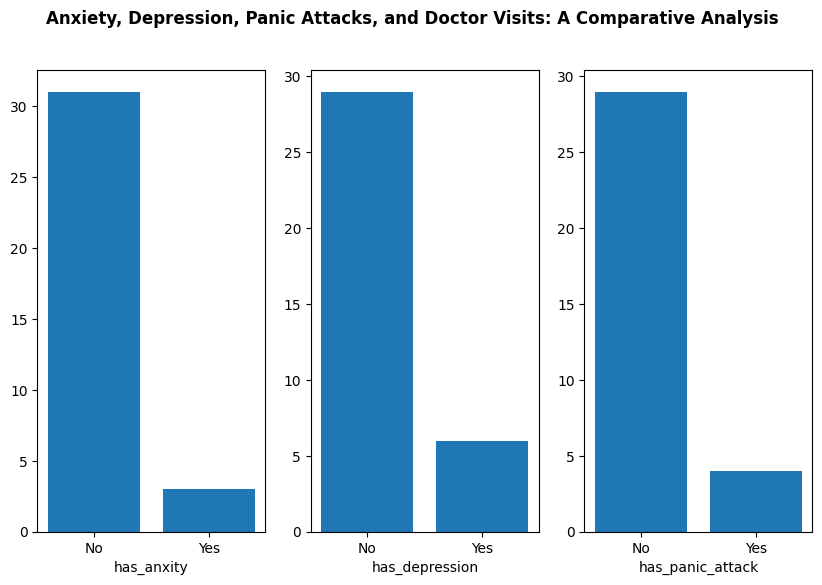

In [177]:
fig, axis = plt.subplots(1,3, figsize=(10, 6))
fig.suptitle("Anxiety, Depression, Panic Attacks, and Doctor Visits: A Comparative Analysis",fontweight="bold", size=12)

column_list = ['has_anxity', 'has_depression', 'has_panic_attack']

for i in range(len(column_list)):
    x = working_data[working_data[column_list[i]] == 'Yes']['visited_specialist'].value_counts().index.tolist()
    y = working_data[working_data[column_list[i]] == 'Yes']['visited_specialist'].value_counts().values.tolist()
    axis[i].bar(x, y)
    axis[i].set_xlabel(column_list[i])
